# OLIST Customer segmentation


In [1]:
from IPython.display import HTML


In [2]:
%config IPCompleter.greedy=True
import pandas as pd
from collections import Counter
import numpy as nm
import matplotlib.pyplot as plt
import warnings
import random
import datetime
warnings.filterwarnings("ignore")

In [3]:
customers=pd.read_csv("olist_customers_dataset.csv")
customers.name= "customers"
geo=pd.read_csv("olist_geolocation_dataset.csv")
geo.name= "geolocation"
items=pd.read_csv("olist_order_items_dataset.csv")
items.name="order items"
payments=pd.read_csv("olist_order_payments_dataset.csv")
payments.name= "order payments"
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
reviews.name= "order reviews"
orders=pd.read_csv("olist_orders_dataset.csv")
orders.name='orders'
products=pd.read_csv("olist_products_dataset.csv")
products.name="products"
sellers=pd.read_csv("olist_sellers_dataset.csv")
sellers.name="sellers"
geo= pd.read_csv("olist_geolocation_dataset.csv")
geo.name="Zip geolocalization"

In [4]:
def exploreFrequencies(customers):
    print("{0:30} {1:25} {2:25}".format(customers.name, "unique values", "missing values"))
    for i in customers:
        print("{0:30} {1:20} {2:20}".format(i, customers[i].nunique(),customers[i].isna().sum()))
    print("------------------------------------")

# Exploratory Analysis

## Dataset available columns, unique and missing values

In [5]:
exploreFrequencies(customers)
exploreFrequencies(items)
exploreFrequencies(payments)
exploreFrequencies(reviews)
exploreFrequencies(orders)
exploreFrequencies(products)
exploreFrequencies(sellers)
exploreFrequencies(geo)


customers                      unique values             missing values           
customer_id                                   99441                    0
customer_unique_id                            96096                    0
customer_zip_code_prefix                      14994                    0
customer_city                                  4119                    0
customer_state                                   27                    0
------------------------------------
order items                    unique values             missing values           
order_id                                      98666                    0
order_item_id                                    21                    0
product_id                                    32951                    0
seller_id                                      3095                    0
shipping_limit_date                           93318                    0
price                                          5968                

## Number customers and sellers per state

In [6]:
k=pd.DataFrame({'customers':customers['customer_state'].value_counts(),'sellers':sellers['seller_state'].value_counts()})
print("-------Customers and sellers location per state-----")
k=k.sort_values(by='customers',ascending=False)
k=k.fillna(0)
print(k)
k['sellers']= k['sellers'].apply( lambda x:x/k['sellers'].sum())
k['customers']= k['customers'].apply( lambda x:x/k['customers'].sum())

-------Customers and sellers location per state-----
    customers  sellers
SP      41746   1849.0
RJ      12852    171.0
MG      11635    244.0
RS       5466    129.0
PR       5045    349.0
SC       3637    190.0
BA       3380     19.0
DF       2140     30.0
ES       2033     23.0
GO       2020     40.0
PE       1652      9.0
CE       1336     13.0
PA        975      1.0
MT        907      4.0
MA        747      1.0
MS        715      5.0
PB        536      6.0
PI        495      1.0
RN        485      5.0
AL        413      0.0
SE        350      2.0
TO        280      0.0
RO        253      2.0
AM        148      1.0
AC         81      1.0
AP         68      0.0
RR         46      0.0


## Percentage of customers and sellers per state

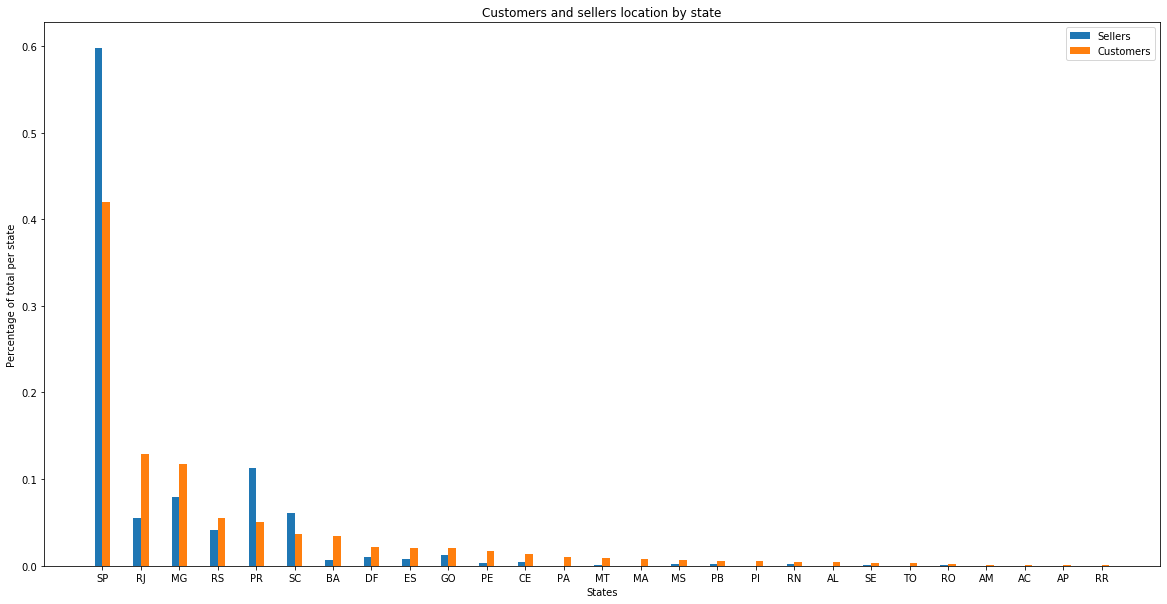

In [7]:

labels = k.T.columns
sel = k['sellers']
cus = k['customers']

x = nm.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))

rects1 = ax.bar(x - width/2, sel, width, label='Sellers')
rects2 = ax.bar(x + width/2, cus, width, label='Customers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of total per state')
ax.set_xlabel('States')
ax.set_title('Customers and sellers location by state')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

## Order total and item price visualization

Text(0, 0.5, 'currency units')

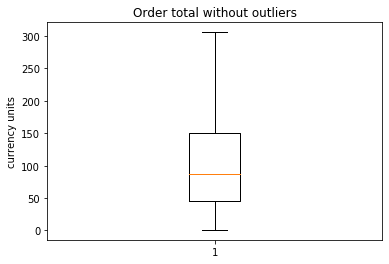

In [8]:
plt.boxplot(items.groupby(by='order_id')['price'].sum(), showfliers=False)
plt.title("Order total without outliers")
plt.ylabel("currency units")

Text(0, 0.5, 'currency units')

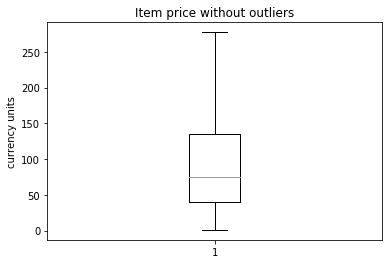

In [9]:
plt.boxplot(items['price'], showfliers=False)
plt.title("Item price without outliers")
plt.ylabel("currency units")

## Number of items sold by one seller

Text(0, 0.5, 'Number of items')

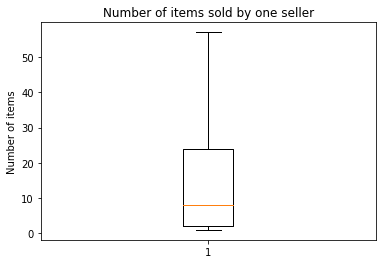

In [10]:
d=pd.DataFrame(items.groupby(by='seller_id').size().sort_values(0,ascending=False))
d.head(5)
plt.boxplot(d.T,showfliers=False)
plt.title("Number of items sold by one seller")
plt.ylabel("Number of items")

## Preferred payment methods

Text(0, 0.5, 'Number of transactions used a specific method')

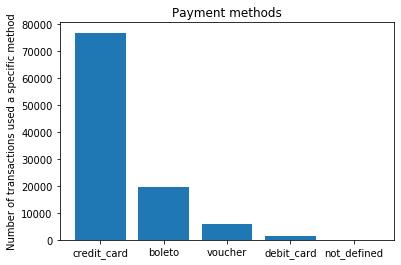

In [11]:
z=pd.DataFrame(payments['payment_type'].value_counts())
plt.bar(z.index, z.payment_type,tick_label=z.T.columns)
plt.title("Payment methods")
plt.ylabel("Number of transactions used a specific method")


## Number of items per order

Text(0, 0.5, 'Percentage')

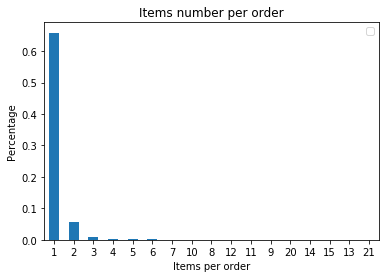

In [12]:
ax=pd.DataFrame(items.groupby(by='order_id')['order_item_id'].size().value_counts()).apply(lambda x:x/items['order_item_id'].sum()).plot(kind="bar", title="Items number per order", rot=0)
ax.legend("")
ax.set_xlabel("Items per order")
ax.set_ylabel("Percentage")




## Orders per year

2018    54011
2017    45101
2016      329
Name: year, dtype: int64


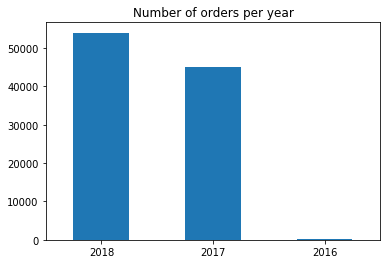

In [13]:
orders["year"]= orders['order_purchase_timestamp'].str[:4]
col=[orders["year"]==2017]
sc=orders["year"].value_counts()
print(sc)

ax=sc.plot(kind="bar", title="Number of orders per year", rot=0)


In [14]:
#will remove
orders.pivot_table(index=['customer_id'], aggfunc='size').value_counts()

1    99441
dtype: int64

## Number of reviews per order

1    98886
2      551
3        4
dtype: int64


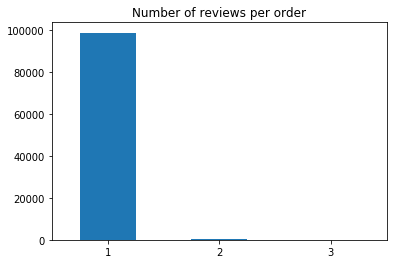

In [15]:
#reviews per order
a=reviews.groupby('order_id').size()
dd=a.value_counts()
print(dd)
az=dd.plot(kind="bar", title= "Number of reviews per order", rot=0)
az

## Distribution of review scores

Text(0, 0.5, 'Order number for a specific review score')

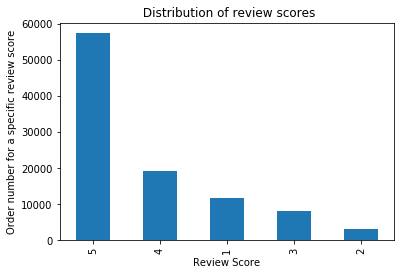

In [16]:
o=reviews['review_score'].value_counts()
ax=o.plot(kind='bar', title= " Distribution of review scores", rot=90)
ax.set_xlabel("Review Score")
ax.set_ylabel("Order number for a specific review score")


## Analysis of item price and freight cost

In [17]:
items[['price','freight_value']].describe()

price  freight_value
count  112650.000000  112650.000000
mean      120.653739      19.990320
std       183.633928      15.806405
min         0.850000       0.000000
25%        39.900000      13.080000
50%        74.990000      16.260000
75%       134.900000      21.150000
max      6735.000000     409.680000

Text(0.5, 0, 'Item price')

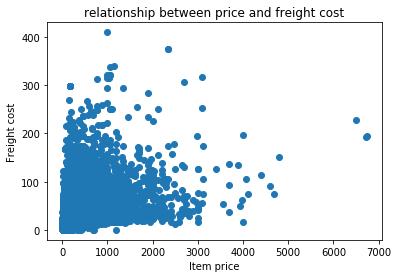

In [18]:
plt.scatter(items['price'], items['freight_value'])
plt.title("relationship between price and freight cost")
plt.ylabel("Freight cost")
plt.xlabel("Item price")

## Relationship between description length, photos number and number of sold items

       quantity_sold  product_description_lenght
count   32951.000000                32341.000000
mean        3.418713                  771.495285
std        10.619709                  635.115225
min         1.000000                    4.000000
25%         1.000000                  339.000000
50%         1.000000                  595.000000
75%         3.000000                  972.000000
max       527.000000                 3992.000000


Text(0.5, 0, 'Quantity sold')

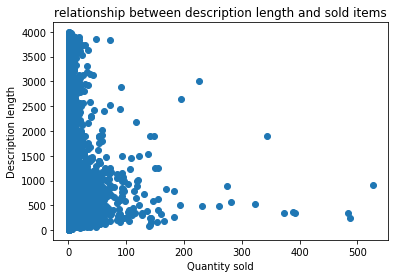

In [19]:
f=products[['product_id','product_description_lenght','product_photos_qty']]
i=pd.DataFrame(items.groupby(by='product_id').size()).reset_index()
f= f.merge(i, how="left", on='product_id')
f['quantity_sold']=f[0]
f=f.drop(0, axis=1)
print(f[['quantity_sold','product_description_lenght']].describe())
plt.scatter(f['quantity_sold'], f['product_description_lenght'])
plt.title("relationship between description length and sold items")
plt.ylabel("Description length")
plt.xlabel("Quantity sold")

       quantity_sold  product_photos_qty
count   32951.000000        32341.000000
mean        3.418713            2.188986
std        10.619709            1.736766
min         1.000000            1.000000
25%         1.000000            1.000000
50%         1.000000            1.000000
75%         3.000000            3.000000
max       527.000000           20.000000


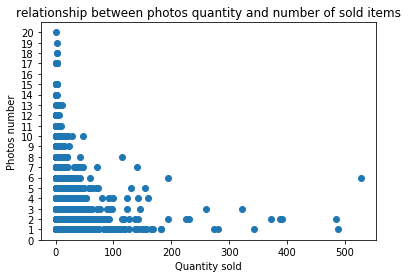

In [20]:
print(f[['quantity_sold','product_photos_qty']].describe())
plt.scatter(f['quantity_sold'], f['product_photos_qty'])
plt.title("relationship between photos quantity and number of sold items")
plt.ylabel("Photos number")
plt.xlabel("Quantity sold")
plt.yticks(nm.arange(0, 21, step=1))
plt.show()

# Feature engineering




## Number of orders per customer
for further analysis we combined customers with more than 3 orders into group of cutomers with 3 orders

In [21]:
s=pd.DataFrame(customers.groupby('customer_unique_id').size().reset_index())
s['nbOrders']=s[0]
s.drop(0,axis=1)
f=s['nbOrders'].value_counts()
f

1     93099
2      2745
3       203
4        30
5         8
6         6
7         3
17        1
9         1
Name: nbOrders, dtype: int64

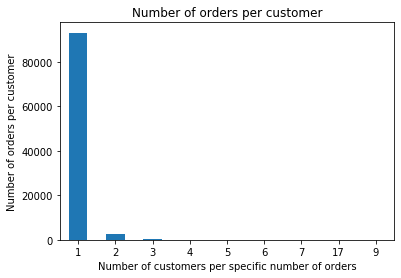

In [22]:
d=s.merge(customers.drop_duplicates('customer_unique_id',keep="last"),how='left',on="customer_unique_id")
co=d['nbOrders'].value_counts()
#plt.bar(co.index,co.values)
ax=co.plot(kind='bar', title="Number of orders per customer", rot=0)
ax.set_xlabel("Number of customers per specific number of orders")
ax.set_ylabel("Number of orders per customer")
d=d.drop(0,axis=1)
#keep max 10 orders
d['nbOrders']=d['nbOrders'].apply(lambda s:s if s<4 else 3)


In [23]:
ordersList=customers.groupby('customer_unique_id')['customer_id'].apply(list).to_dict()

#list of customer_ids associated with customer_unique_ids. 1 customer unique id can have many ids      

## Average Order Total Spent by a customer
for further analysis we removed outliers>300

In [24]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
money= pd.DataFrame(columns=["customer_unique_id","total"])
for i in ordersList:
    total=0
    orderCounter=0
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            orderCounter=orderCounter+1
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                #print(ea[1])
            #if(len(itemsOrder['price'])>0):
                #total+=itemsOrder['price'].values[0]  
                total+=ea[5]
    if orderCounter>0:
        v=total/orderCounter
    else:
        v=0
        print(total)
    
    money=money.append({'customer_unique_id':i, 'total':v},ignore_index=True)
money.to_csv("averagePerOrderMoneySpent.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nmoney= pd.DataFrame(columns=["customer_unique_id","total"])\nfor i in ordersList:\n    total=0\n    orderCounter=0\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        for orde in ordersPerCs:\n            orderCounter=orderCounter+1\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]].values\n            for ea in itemsOrder:\n                #print(ea[1])\n            #if(len(itemsOrder[\'price\'])>0):\n                #total+=itemsOrder[\'price\'].values[0]  \n                total+=ea[5]\n    if orderCounter>0:\n        v=total/orderCounter\n    else:\n        v=0\n        print(total)\n    \n    money=money.append({\'customer_unique_id\':i, \'total\':v},ignore_index=True)\nmoney.to_csv("averagePerOrderMoneySpent.csv", e

count    96096.000000
mean       137.163463
std        210.735847
min          0.000000
25%         45.827500
50%         85.990000
75%        149.900000
max      13440.000000
Name: total, dtype: float64


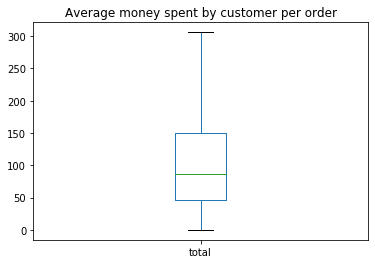

In [25]:
money=pd.read_csv("averagePerOrderMoneySpent.csv")
print(money['total'].describe())
money['total'].plot(kind='box', showfliers=False, title="Average money spent by customer per order")
money['total']=money['total'].apply(lambda s:s if s<300 else 300)

## Average review score by customer

In [26]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
revs= pd.DataFrame(columns=["customer_unique_id","reveiwScore"])
for i in ordersList:
    score=0
    count=0
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            reviewsOrder=reviews.loc[reviews['order_id']==orde[0]].values
            for r in reviewsOrder:
                score=score+r[2]
                count=count+1
                
    revs=revs.append({'customer_unique_id':i, 'reviewScore':score/count},ignore_index=True)
revs.to_csv("reviewsCustomers.csv", encoding='utf-8', index=False)
 '''   
    

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nrevs= pd.DataFrame(columns=["customer_unique_id","reveiwScore"])\nfor i in ordersList:\n    score=0\n    count=0\n    \n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        for orde in ordersPerCs:\n            reviewsOrder=reviews.loc[reviews[\'order_id\']==orde[0]].values\n            for r in reviewsOrder:\n                score=score+r[2]\n                count=count+1\n                \n    revs=revs.append({\'customer_unique_id\':i, \'reviewScore\':score/count},ignore_index=True)\nrevs.to_csv("reviewsCustomers.csv", encoding=\'utf-8\', index=False)\n '

count    96096.000000
mean         4.069535
std          1.353446
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: reviewScore, dtype: float64


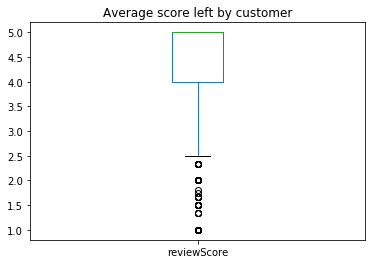

In [27]:
revs=pd.read_csv("reviewsCustomers.csv")
print(revs['reviewScore'].describe())
revs['reviewScore'].plot(kind='box', title="Average score left by customer")

### Customer retention score

based on reveiw score and number of orders

count    96096.000000
mean         0.841711
std          0.324236
min          0.200000
25%          0.800000
50%          1.000000
75%          1.000000
max          3.000000
Name: retentionScore, dtype: float64


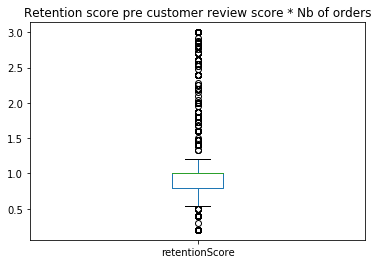

In [70]:
#consider 5 star order as happy customer ready to return= 1
#2= loyals
revs=revs.merge(d[['customer_unique_id','nbOrders']],how='left',on='customer_unique_id')
revs['retentionScore']=revs['reviewScore']/5*revs['nbOrders']
print(revs['retentionScore'].describe())
#revs['retentionScore'].plot(kind='box', title="Retention score pre customer review score * Nb of orders")
revs['retentionScore']=revs['retentionScore'].apply(lambda s:s if s<3 else 3 )
revs['retentionScore'].plot(kind='box', title="Retention score pre customer review score * Nb of orders")
revs=revs.drop('nbOrders', axis=1)



## Number of resellers per customer
 - identify frequency of various categories and apply it as category score
 - group of customers with 5 resellers includes also those who had more than 5 resellers

In [29]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
vendeurs= pd.DataFrame(columns=["customer_unique_id","totalSellers"])
for i in ordersList:
    total=[]
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(len(itemsOrder['seller_id'])>0):
                
                sstr=str(itemsOrder['seller_id'].values)
                
                if (sstr not in total):
                    
                    total.append(sstr)
    vendeurs=vendeurs.append({'customer_unique_id':i, 'totalSellers':len(total)},ignore_index=True)
vendeurs.to_csv("resellersPerCustomer.csv", encoding='utf-8', index=False)

'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nvendeurs= pd.DataFrame(columns=["customer_unique_id","totalSellers"])\nfor i in ordersList:\n    total=[]\n    \n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        for orde in ordersPerCs:\n            itemsOrder=items.loc[items[\'order_id\']==orde[0]]\n            if(len(itemsOrder[\'seller_id\'])>0):\n                \n                sstr=str(itemsOrder[\'seller_id\'].values)\n                \n                if (sstr not in total):\n                    \n                    total.append(sstr)\n    vendeurs=vendeurs.append({\'customer_unique_id\':i, \'totalSellers\':len(total)},ignore_index=True)\nvendeurs.to_csv("resellersPerCustomer.csv", encoding=\'utf-8\', index=False)\n\n'

1    93160
2     2104
0      676
3      126
4       16
5        7
6        5
9        1
8        1
Name: totalSellers, dtype: int64


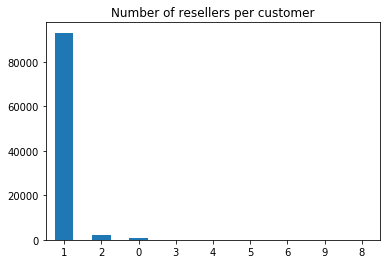

In [30]:
vend=pd.read_csv("resellersPerCustomer.csv")
print(vend['totalSellers'].value_counts())
vend['totalSellers'].value_counts().plot(kind='bar', title="Number of resellers per customer",rot=0)
vend['totalSellers']=vend['totalSellers'].apply(lambda s:s if s<6 else 5)

## Maximum distance purchased from per customer

In [31]:
from math import sin, cos, sqrt, atan2, radians

def distance(a,b):
    R = 6373.0
    aa=geo.loc[geo['geolocation_zip_code_prefix'].values == a].head(1)
    bb= geo.loc[geo['geolocation_zip_code_prefix'].values == b].head(1)
    if len(aa)==0:
        a1= geo['geolocation_lat'].mean()
        a2= geo['geolocation_lng'].mean()
    else:
        a1=aa['geolocation_lat'].values
        a2=aa['geolocation_lng'].values
    if len(bb)==0:
        b1= geo['geolocation_lat'].mean()
        b2= geo['geolocation_lng'].mean()
    else:
        b1=bb['geolocation_lat'].values
        b2=bb['geolocation_lng'].values
            
   
    lat1 = radians(a1)
    lon1 = radians(a2)
    lat2 = radians(b1)
    lon2 = radians(b2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    return R * c


In [32]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
distances= pd.DataFrame(columns=["customer_unique_id","maximumDistance"])
for i in ordersList:
    total=0
    customerZip=customers.loc[customers['customer_unique_id']==i]['customer_zip_code_prefix'].values[0]
    
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        for orde in ordersPerCs:
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(len(itemsOrder['seller_id'])>0):
                    for sal in itemsOrder['seller_id']:
                        zips= sellers.loc[sellers['seller_id']==sal]
                        sellerZip=zips['seller_zip_code_prefix'].values
                        #print(customerZip)
                        #print(int(sellerZip))
                        if(int(customerZip)>0 and int(sellerZip)>0):
                            dist=distance(int(customerZip),int(sellerZip))
                            if dist>total:
                                total=dist
                            
    distances=distances.append({'customer_unique_id':i, 'maximumDistance': total},ignore_index=True)
distances.to_csv("MaximumDistancePerCustomer.csv", encoding='utf-8', index=False)

'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\ndistances= pd.DataFrame(columns=["customer_unique_id","maximumDistance"])\nfor i in ordersList:\n    total=0\n    customerZip=customers.loc[customers[\'customer_unique_id\']==i][\'customer_zip_code_prefix\'].values[0]\n    \n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        for orde in ordersPerCs:\n            itemsOrder=items.loc[items[\'order_id\']==orde[0]]\n            if(len(itemsOrder[\'seller_id\'])>0):\n                    for sal in itemsOrder[\'seller_id\']:\n                        zips= sellers.loc[sellers[\'seller_id\']==sal]\n                        sellerZip=zips[\'seller_zip_code_prefix\'].values\n                        #print(customerZip)\n                        #print(int(sellerZip))\n                        if(int(customerZip

count    96096.000000
mean       602.349296
std        598.388790
min          0.000000
25%        184.449508
50%        434.235259
75%        802.016361
max       8739.690342
Name: maximumDistance, dtype: float64


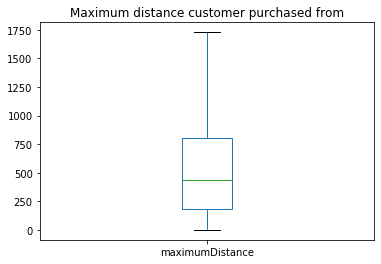

In [33]:
distance=pd.read_csv("MaximumDistancePerCustomer.csv")
print(distance['maximumDistance'].describe())
distance['maximumDistance'].plot(kind='box', title="Maximum distance customer purchased from", showfliers=False)
distance['maximumDistance']=distance['maximumDistance'].apply(lambda s:s if s<1750 else 1750)

##  Mode of items per customer order
 group with 5 items per customer order also includes those who has more than 5

In [34]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
itemsNumber= pd.DataFrame(columns=["customer_unique_id","nbItems"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    
    
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]]
            if(itemsOrder.shape[0]>0):
                totalItems.append(itemsOrder.shape[0])
    
    if len(totalItems)>0:
        c = Counter(totalItems)
        v=c.most_common(1)[0][0]
        
    else:
        v=0
        
    itemsNumber=itemsNumber.append({'customer_unique_id':i, 'nbItems': v},ignore_index=True)
    
itemsNumber.to_csv("itemsNumberPerCustomer.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nitemsNumber= pd.DataFrame(columns=["customer_unique_id","nbItems"])\n#get all customer ids\nfor i in ordersList:\n    totalItems=[]\n    \n    \n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]]\n            if(itemsOrder.shape[0]>0):\n                totalItems.append(itemsOrder.shape[0])\n    \n    if len(totalItems)>0:\n        c = Counter(totalItems)\n        v=c.most_common(1)[0][0]\n        \n    else:\n        v=0\n        \n    itemsNumber=itemsNumber.append({\'customer_unique_id\':i, \'nbItems\': v},ignore_index=True)\n    \ni

1    86116
2     7172
3     1232
0      676
4      471
Name: nbItems, dtype: int64


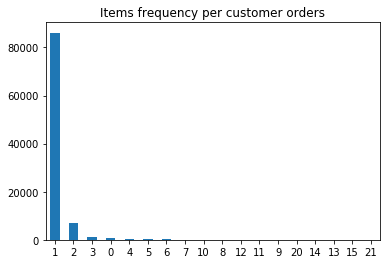

In [35]:
itemsNumber=pd.read_csv("itemsNumberPerCustomer.csv")
vv=itemsNumber['nbItems'].value_counts()
print(vv.head(5))
vv.plot(kind='bar', title="Items frequency per customer orders",rot=0)
itemsNumber['nbItems']=itemsNumber['nbItems'].apply(lambda s:s if s<6 else 5)

## customer payment method
 identify frequency of various categories and apply it as category score


In [36]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
from collections import Counter

paymentMethod= pd.DataFrame(columns=["customer_unique_id","paymentMethod"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    
    
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            method=payments.loc[payments['order_id']==orde[0]]
            if(method.empty!=True):
                
                totalItems.append(method.values[0][2])
    if len(totalItems)>0:
        c = Counter(totalItems)
        v=c.most_common(1)[0][0]
    else:
        v='not known'
    
    paymentMethod=paymentMethod.append({'customer_unique_id':i, 'paymentMethod': v},ignore_index=True)
    
paymentMethod.to_csv("paymentMethod.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nfrom collections import Counter\n\npaymentMethod= pd.DataFrame(columns=["customer_unique_id","paymentMethod"])\n#get all customer ids\nfor i in ordersList:\n    totalItems=[]\n    \n    \n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            method=payments.loc[payments[\'order_id\']==orde[0]]\n            if(method.empty!=True):\n                \n                totalItems.append(method.values[0][2])\n    if len(totalItems)>0:\n        c = Counter(totalItems)\n        v=c.most_common(1)[0][0]\n    else:\n        v=\'not known\'\n    \n    paymentMethod=paymentMethod.append({\'customer_un

credit_card    72861
boleto         19161
voucher         2583
debit_card      1487
not_defined        3
not known          1
Name: paymentMethod, dtype: int64


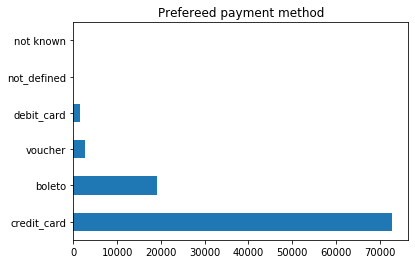

In [37]:
paymentMethod=pd.read_csv("paymentMethod.csv")
v=paymentMethod['paymentMethod'].value_counts()
print(v)
ax=v.plot(kind='barh', title="Prefereed payment method")
ax

### Payment method score 
 identify frequency of various categories and apply it as category score

In [38]:
paymentMethod['paymentMethodScore']=paymentMethod['paymentMethod'].replace(v.index,v.values)
paymentMethod['paymentMethod']=paymentMethod.drop('paymentMethod',axis=1)

## Preferred Cathegory
 identify frequency of various categories and apply it as category score

In [39]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
category= pd.DataFrame(columns=["customer_unique_id","category"])
#get all customer ids
for i in ordersList:
    totalItems=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                
                produits=products.loc[products['product_id']==ea[2]].values
                
                if (len(produits[0])>0):
                    totalItems.append(produits[0][1])
                        
                                      
    if len(totalItems)>0:
        c = Counter(totalItems)
        c=c.most_common(1)[0][0]
        
    else:
        c='not known'
    
    category=category.append({'customer_unique_id':i, 'category': c},ignore_index=True)
category.to_csv("categoryCustomers.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\ncategory= pd.DataFrame(columns=["customer_unique_id","category"])\n#get all customer ids\nfor i in ordersList:\n    totalItems=[]\n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]].values\n            for ea in itemsOrder:\n                \n                produits=products.loc[products[\'product_id\']==ea[2]].values\n                \n                if (len(produits[0])>0):\n                    totalItems.append(produits[0][1])\n                        \n                                      \n    if len(totalItems)>0:\n        c = 

Number of preferred categories: 74
First 10 categories represent :62.902722277722276% of customers choice


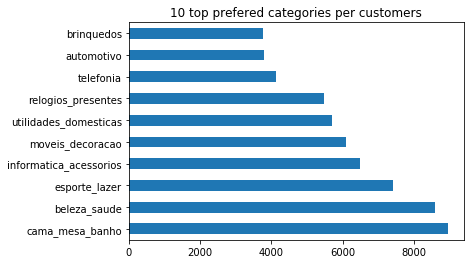

In [40]:
category=pd.read_csv("categoryCustomers.csv")
print("Number of preferred categories: "+str(len(category['category'].unique())))
print("First 10 categories represent :"+str(category['category'].value_counts().head(10).values.sum()/len(category['category'])*100)+ "% of customers choice")

ax=category['category'].value_counts().head(10).plot(kind='barh', title="10 top prefered categories per customers")
ax

### Preferred category score

In [41]:
k=category['category'].value_counts()
category['categoryScore']=category['category'].replace(k.index,k.values)
category=category.drop('category', axis=1)

## Prefered reseller by customer
 identify frequency of various resellers and apply it as reseller score

In [42]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
frequentReseller= pd.DataFrame(columns=["customer_unique_id","frequent reseller"])
#get all customer ids
for i in ordersList:
    totalSellers=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                
                totalSellers.append(ea[3])
                                    
    if len(totalSellers)>0:
        c = Counter(totalSellers)
        c=c.most_common(1)[0][0]
        
    else:
        c='not known'
    
    frequentReseller=frequentReseller.append({'customer_unique_id':i, 'frequent reseller': c},ignore_index=True)
frequentReseller.to_csv("frequentResellers.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nfrequentReseller= pd.DataFrame(columns=["customer_unique_id","frequent reseller"])\n#get all customer ids\nfor i in ordersList:\n    totalSellers=[]\n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]].values\n            for ea in itemsOrder:\n                \n                totalSellers.append(ea[3])\n                                    \n    if len(totalSellers)>0:\n        c = Counter(totalSellers)\n        c=c.most_common(1)[0][0]\n        \n    else:\n        c=\'not known\'\n    \n    frequentReseller=frequentReseller.append({\'

Number of preferred resellers: 3063
Top 200 resellers represent :58.94626207126207% of customers choice


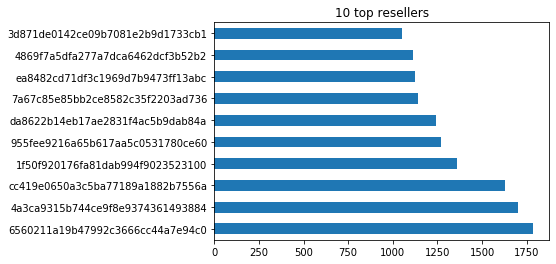

In [43]:
frequentReseller=pd.read_csv("frequentResellers.csv")
print("Number of preferred resellers: "+str(len(frequentReseller['frequent reseller'].unique())))
print("Top 200 resellers represent :"+str(frequentReseller['frequent reseller'].value_counts().head(200).values.sum()/len(frequentReseller['frequent reseller'])*100)+ "% of customers choice")
frequentReseller['frequent reseller'].value_counts().head(10).plot(kind='barh', title="10 top resellers")


### Prefered reseller score

In [44]:
k=frequentReseller['frequent reseller'].value_counts()
frequentReseller['frequentResellerScore']=frequentReseller['frequent reseller'].replace(k.index,k.values)
frequentReseller=frequentReseller.drop('frequent reseller', axis=1)

## Preferred state to purchase from
 identify frequency of various cities s and apply it as city score

In [45]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
purchaseCity= pd.DataFrame(columns=["customer_unique_id","frequent purchase city"])
#get all customer ids
for i in ordersList:
    totalAreas=[]
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            
            itemsOrder=items.loc[items['order_id']==orde[0]].values
            for ea in itemsOrder:
                zips= sellers.loc[sellers['seller_id']==ea[3]].values
                zipo= zips[0][3]
                
                totalAreas.append(zipo)
                                  
    if len(totalAreas)>0:
        c = Counter(totalAreas)
        c=c.most_common(1)[0][0]
        
    else:
        v='not known'
    
    purchaseCity=purchaseCity.append({'customer_unique_id':i, 'frequent purchase city': c},ignore_index=True)
purchaseCity.to_csv("frequentState.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\npurchaseCity= pd.DataFrame(columns=["customer_unique_id","frequent purchase city"])\n#get all customer ids\nfor i in ordersList:\n    totalAreas=[]\n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            \n            itemsOrder=items.loc[items[\'order_id\']==orde[0]].values\n            for ea in itemsOrder:\n                zips= sellers.loc[sellers[\'seller_id\']==ea[3]].values\n                zipo= zips[0][3]\n                \n                totalAreas.append(zipo)\n                                  \n    if len(totalAreas)>0:\n        c = Counter(totalAreas)\n        c=c.most_common(1)[0][0]\n   

SP    68148
MG     7656
PR     7334
RJ     4208
SC     3529
Name: frequent purchase city, dtype: int64


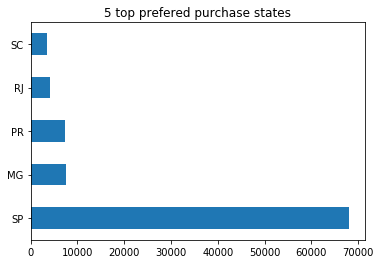

In [46]:
purchaseCity=pd.read_csv("frequentState.csv")
c=purchaseCity['frequent purchase city'].value_counts().head(5)
print(c)
c.plot(kind="barh", title="5 top prefered purchase states")

### State score

In [47]:
k=purchaseCity['frequent purchase city'].value_counts()
purchaseCity['frequentPurchaseStateScore']=purchaseCity['frequent purchase city'].replace(k.index,k.values)
purchaseCity= purchaseCity.drop('frequent purchase city', axis=1)

## Months since the last purchase
0 months is January 2019

In [48]:
'''
############################################################
###############        Extecuted code     ##################
############################################################
import datetime
date_time_str = '2019-01-01 01:01:01'
dateNow = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
purchaseYear= pd.DataFrame(columns=["customer_unique_id","lastPurchase"])
#get all customer ids
for i in ordersList:
    totalMonths=100
    #get all customer orders corresponding to ids
    for u in ordersList[i]:
        ordersPerCs=orders.loc[orders['customer_id']==u].values
        #get all orders items corresponding to ids
        
        for orde in ordersPerCs:
            if pd.isna(orde[4])!=True:
                date_time_str = orde[4]
                dateBefore = datetime.datetime.strptime(date_time_str, '%Y-%m-%d %H:%M:%S')
                dist=round((dateNow - dateBefore).days/30)                                       
                
                if(dist<totalMonths):
                    totalMonths=dist
                    
                else:
                    totalMonths=100
    if(totalMonths==100):
        totalMonths="not known"
    purchaseYear=purchaseYear.append({'customer_unique_id':i, 'lastPurchase': totalMonths},ignore_index=True)
purchaseYear.to_csv("lastPurchase.csv", encoding='utf-8', index=False)
'''

'\n############################################################\n###############        Extecuted code     ##################\n############################################################\nimport datetime\ndate_time_str = \'2019-01-01 01:01:01\'\ndateNow = datetime.datetime.strptime(date_time_str, \'%Y-%m-%d %H:%M:%S\')\npurchaseYear= pd.DataFrame(columns=["customer_unique_id","lastPurchase"])\n#get all customer ids\nfor i in ordersList:\n    totalMonths=100\n    #get all customer orders corresponding to ids\n    for u in ordersList[i]:\n        ordersPerCs=orders.loc[orders[\'customer_id\']==u].values\n        #get all orders items corresponding to ids\n        \n        for orde in ordersPerCs:\n            if pd.isna(orde[4])!=True:\n                date_time_str = orde[4]\n                dateBefore = datetime.datetime.strptime(date_time_str, \'%Y-%m-%d %H:%M:%S\')\n                dist=round((dateNow - dateBefore).days/30)                                       \n                \n

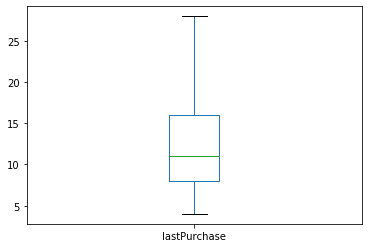

In [49]:
purchaseYear=pd.read_csv("lastPurchase.csv")
y=purchaseYear[purchaseYear["lastPurchase"] != "not known"]
median=y['lastPurchase'].median() 
purchaseYear["lastPurchase"].replace({"not known": median }, inplace=True)
purchaseYear["lastPurchase"].astype(float).plot(kind="box")

In [50]:
k=d['customer_state'].value_counts()
d['customerStateScore']=d['customer_state'].replace(k.index,k.values)
d=d.merge(money, on='customer_unique_id', how='left')
d=d.merge(revs, on='customer_unique_id', how='left')
d=d.merge(vend, on='customer_unique_id', how='left')
d=d.merge(distance, on='customer_unique_id', how='left')
d=d.merge(itemsNumber, on='customer_unique_id', how='left')
d=d.merge(paymentMethod, on='customer_unique_id', how='left')
d=d.merge(purchaseYear, on='customer_unique_id', how='left')
d=d.merge(purchaseCity, on='customer_unique_id', how='left')
d=d.merge(category, on='customer_unique_id', how='left')
d=d.merge(frequentReseller, on='customer_unique_id', how='left')
d=d.drop(['reviewScore',"customer_id",'customer_state'],axis=1)
d.columns

Index(['customer_unique_id', 'nbOrders', 'customer_zip_code_prefix',
       'customer_city', 'customerStateScore', 'total', 'retentionScore',
       'totalSellers', 'maximumDistance', 'nbItems', 'paymentMethod',
       'paymentMethodScore', 'lastPurchase', 'frequentPurchaseStateScore',
       'categoryScore', 'frequentResellerScore'],
      dtype='object')

In [51]:

l=d[[ 'nbOrders', 
        'customerStateScore',
       'total', 'retentionScore', 'totalSellers', 'maximumDistance', 'nbItems',
        'paymentMethodScore', 'lastPurchase',
       'frequentPurchaseStateScore',  'frequentResellerScore']]
from sklearn import preprocessing

x = l.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
l = pd.DataFrame(x_scaled, columns=l.columns)



In [53]:
l.describe()

nbOrders  customerStateScore         total  retentionScore  \
count  96096.000000        96096.000000  96096.000000    96096.000000   
mean       0.016905            0.515573      0.368069        0.229182   
std        0.097355            0.420740      0.281878        0.115799   
min        0.000000            0.000000      0.000000        0.000000   
25%        0.000000            0.120083      0.152758        0.214286   
50%        0.000000            0.306557      0.286633        0.285714   
75%        0.000000            1.000000      0.499667        0.285714   
max        1.000000            1.000000      1.000000        1.000000   

       totalSellers  maximumDistance       nbItems  paymentMethodScore  \
count  96096.000000     96096.000000  96096.000000        96096.000000   
mean       0.203713         0.323492      0.225160            0.811913   
std        0.038812         0.284609      0.096471            0.335913   
min        0.000000         0.000000      0.000000            0.000000   
25%        0.200000         0.105400      0.200000            1.000000   
50%        0.200000         0.248134      0.200000            1.000000   
75%        0.200000         0.458295      0.200000            1.000000   
max        1.000000         1.000000      1.000000            1.000000   

       lastPurchase  frequentPurchaseStateScore  frequentResellerScore  
count  96096.000000                96096.000000           96096.000000  
mean       0.336210                    0.731745               0.201440  
std        0.210920                    0.419392               0.264010  
min        0.000000                    0.000000               0.000000  
25%        0.166667                    0.112331               0.026345  
50%        0.291667                    1.000000               0.080157  
75%        0.500000                    1.000000               0.244395  
max        1.000000                    1.000000               1.000000

# Clustering
## K- means clustering
Finding optimal number of clusters:
- intra cluster distance
- silhouette score


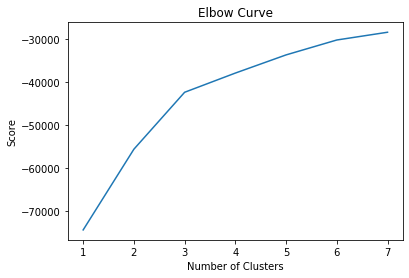

In [54]:
from sklearn.cluster import KMeans

num_clusters = 8
kmeans_tests = [KMeans(n_clusters=i, init='random', n_init=10) for i in range(1, num_clusters)]
score = [kmeans_tests[i].fit(l).score(l) for i in range(len(kmeans_tests))]
plt.plot(range(1, num_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()


In [55]:
from sklearn.model_selection import KFold
from sklearn.metrics import silhouette_samples, silhouette_score
n_clusters=8
score=[]
for r in range(2,n_clusters): 
    clusterer = KMeans(n_clusters=r, random_state=10)
    kfold = KFold( n_splits=5)
    sco=[]

    for train_index, test_index in kfold.split(l):
        train = l.iloc[train_index]
        trainY = clusterer.fit_predict(train)
        test=l.iloc[test_index]
        testY=clusterer.fit_predict(test)
        r1=silhouette_score(train, trainY)
        r2=silhouette_score(test, testY)
        mm=(r1+r2)/2
        sco.append(mm)
               
    ss=pd.DataFrame(sco).mean()
    score.append(ss.values)
        
    '''
    clusterer = KMeans(n_clusters=r, random_state=10)
    cluster_labels = clusterer.fit_predict(l)
    silhouette_avg = silhouette_score(l, cluster_labels)
    score.append(silhouette_avg)
    '''

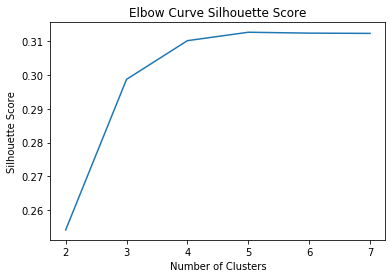

In [56]:
plt.plot(range(2, n_clusters),score)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow Curve Silhouette Score')
plt.show()

In [57]:
g=KMeans(n_clusters=4, init='random', n_init=10)
b=g.fit(l).labels_


### Finding best parameters by using Ajusted Rand Index 

In [58]:
#from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer,adjusted_rand_score
#j=b.reshape(-1, 1)

sc=make_scorer(adjusted_rand_score)
km=KMeans(n_clusters=4)
from sklearn.model_selection import GridSearchCV
parameters = {'init':('k-means++', 'random'),'max_iter':[100,200,300],'n_init':[5,10,15]}
clf = GridSearchCV(km, parameters,scoring=sc)
clf.fit(l,b)
indx=clf.cv_results_['rank_test_score'].tolist().index(1)
print("ARI score mean :"+str(clf.cv_results_['mean_test_score'][indx]))
print("Best parameters: "+str(clf.best_params_))

ARI score mean :1.0
Best parameters: {'init': 'k-means++', 'max_iter': 100, 'n_init': 10}


In [59]:

'''
#####################################################
### TESTING CUSTOM GRID SEARCH ######################
#####################################################

io={"parameter":{'init':['k-means++', 'random']}}

def customGrid1(parameter=None):
    
    average=[]
    for k,v in parameter.items():
        
        for g in v:
            kw={k:g}
            op = KMeans(n_clusters=4,**kw)
            sam=l
            lb= sam['cluster']
            sam= sam.drop('cluster',axis=1)
        
            kfold = KFold( n_splits=10)
            sco=[]

            for train_index, test_index in kfold.split(sam):
                train = sam.iloc[train_index]
                trainY=lb.iloc[train_index]
                test=sam.iloc[test_index]
                testY=lb.iloc[test_index]
                r1=op.fit(train).labels_
                r2=op.fit(test).labels_
                mm=adjusted_rand_score(r1,trainY)
                nn=adjusted_rand_score(r2,testY)
                mm=(mm+nn)/2
                sco.append(mm)
               
            ss=pd.DataFrame(sco).mean()
            
            average.append({g:ss})
    return average

print(customGrid1(**io))

####################################################################################################
##############                 Result            ###################################################
####################################################################################################
#[{'k-means++': 0    1.0
#dtype: float64}, {'random': 0    0.92968
#dtype: float64}]
####################################################################################################
'''



'\n#####################################################\n### TESTING CUSTOM GRID SEARCH ######################\n#####################################################\n\nio={"parameter":{\'init\':[\'k-means++\', \'random\']}}\n\ndef customGrid1(parameter=None):\n    \n    average=[]\n    for k,v in parameter.items():\n        \n        for g in v:\n            kw={k:g}\n            op = KMeans(n_clusters=4,**kw)\n            sam=l\n            lb= sam[\'cluster\']\n            sam= sam.drop(\'cluster\',axis=1)\n        \n            kfold = KFold( n_splits=10)\n            sco=[]\n\n            for train_index, test_index in kfold.split(sam):\n                train = sam.iloc[train_index]\n                trainY=lb.iloc[train_index]\n                test=sam.iloc[test_index]\n                testY=lb.iloc[test_index]\n                r1=op.fit(train).labels_\n                r2=op.fit(test).labels_\n                mm=adjusted_rand_score(r1,trainY)\n                nn=adjusted_rand_sco

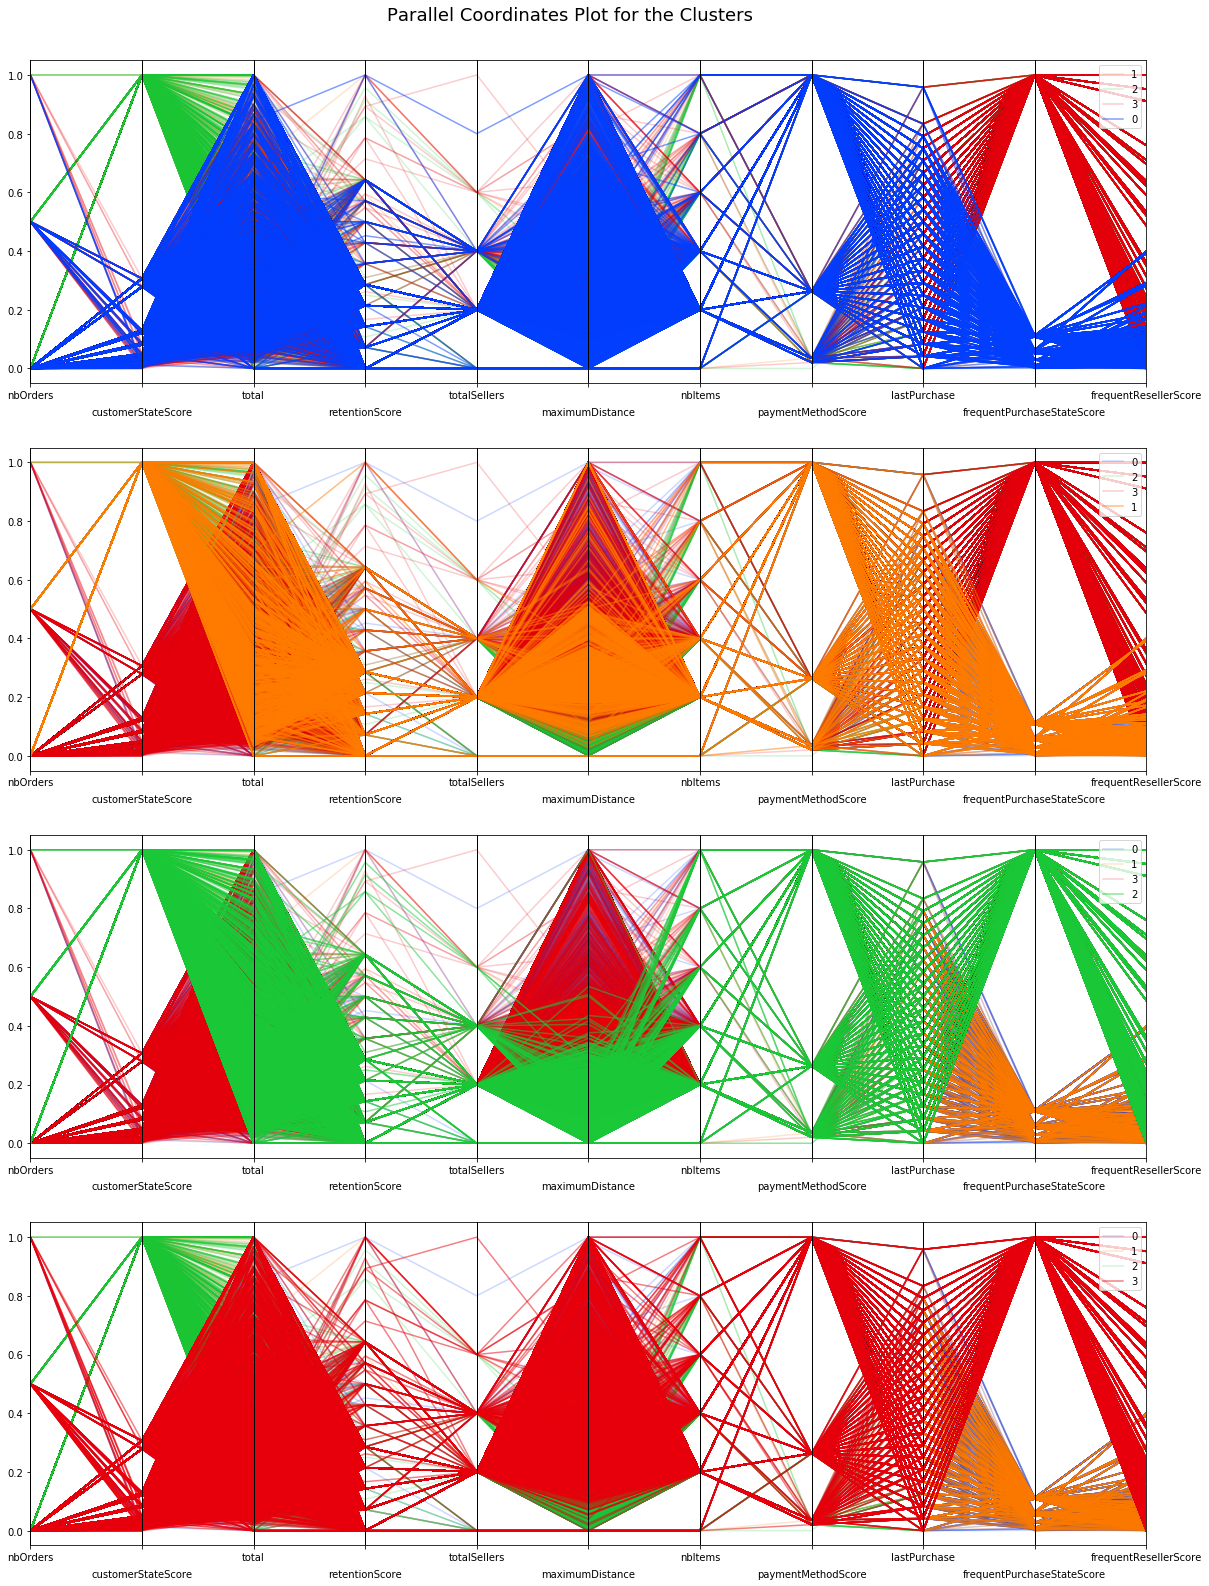

In [60]:
%run functions
l['cluster']=b
sample=l.sample(frac=0.1, replace=True, random_state=1)
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(sample, 4)

### Customer allocation by clusters and cluster visualization using t-SNE

In [61]:
l['cluster'].value_counts()

3    37560
2    30588
0    18244
1     9704
Name: cluster, dtype: int64

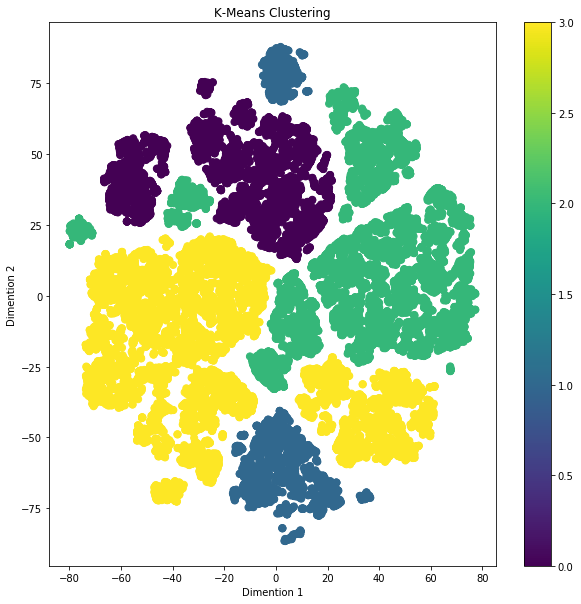

In [62]:
from sklearn.manifold import TSNE
lsample= l.sample(frac=0.3)
X_embedded = TSNE(n_components=2).fit_transform(lsample)
dataV=pd.DataFrame(X_embedded, columns=["D1","D2"])
dataV['cluster']=lsample['cluster'].tolist()
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(dataV['D1'],dataV['D2'],
                  c=dataV['cluster'],   s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Dimention 1')
ax.set_ylabel('Dimention 2')
plt.colorbar(scatter)

### Clusters K-means
 
From business point of view number of clusters and properties of the customers distributed over different clusters is not effective. K-means has mostly divided customers by location and distance, many of other variables are not taken into account.
Furthermore cluster visualization with help of T-SNE shows some anornalities.

## Clustering using OPTICS
 6 clusters customers allocations

In [63]:
#for more than 2 dimensions: minPts=2*dim (Sander et al., 1998)
from sklearn.cluster import OPTICS, cluster_optics_dbscan
import matplotlib.gridspec as gridspec
X=l
X=X.drop('cluster', axis=1)
clust = OPTICS(min_samples=2*len(X.columns), xi=.05, min_cluster_size=.05)

# Run the fit
labelsDB=clust.fit(X).labels_


In [71]:
X['cluster']= labelsDB
X['cluster'].value_counts()

 1    27433
 0    22310
 3    13617
-1    11750
 2     7239
 4     7237
 5     6510
Name: cluster, dtype: int64

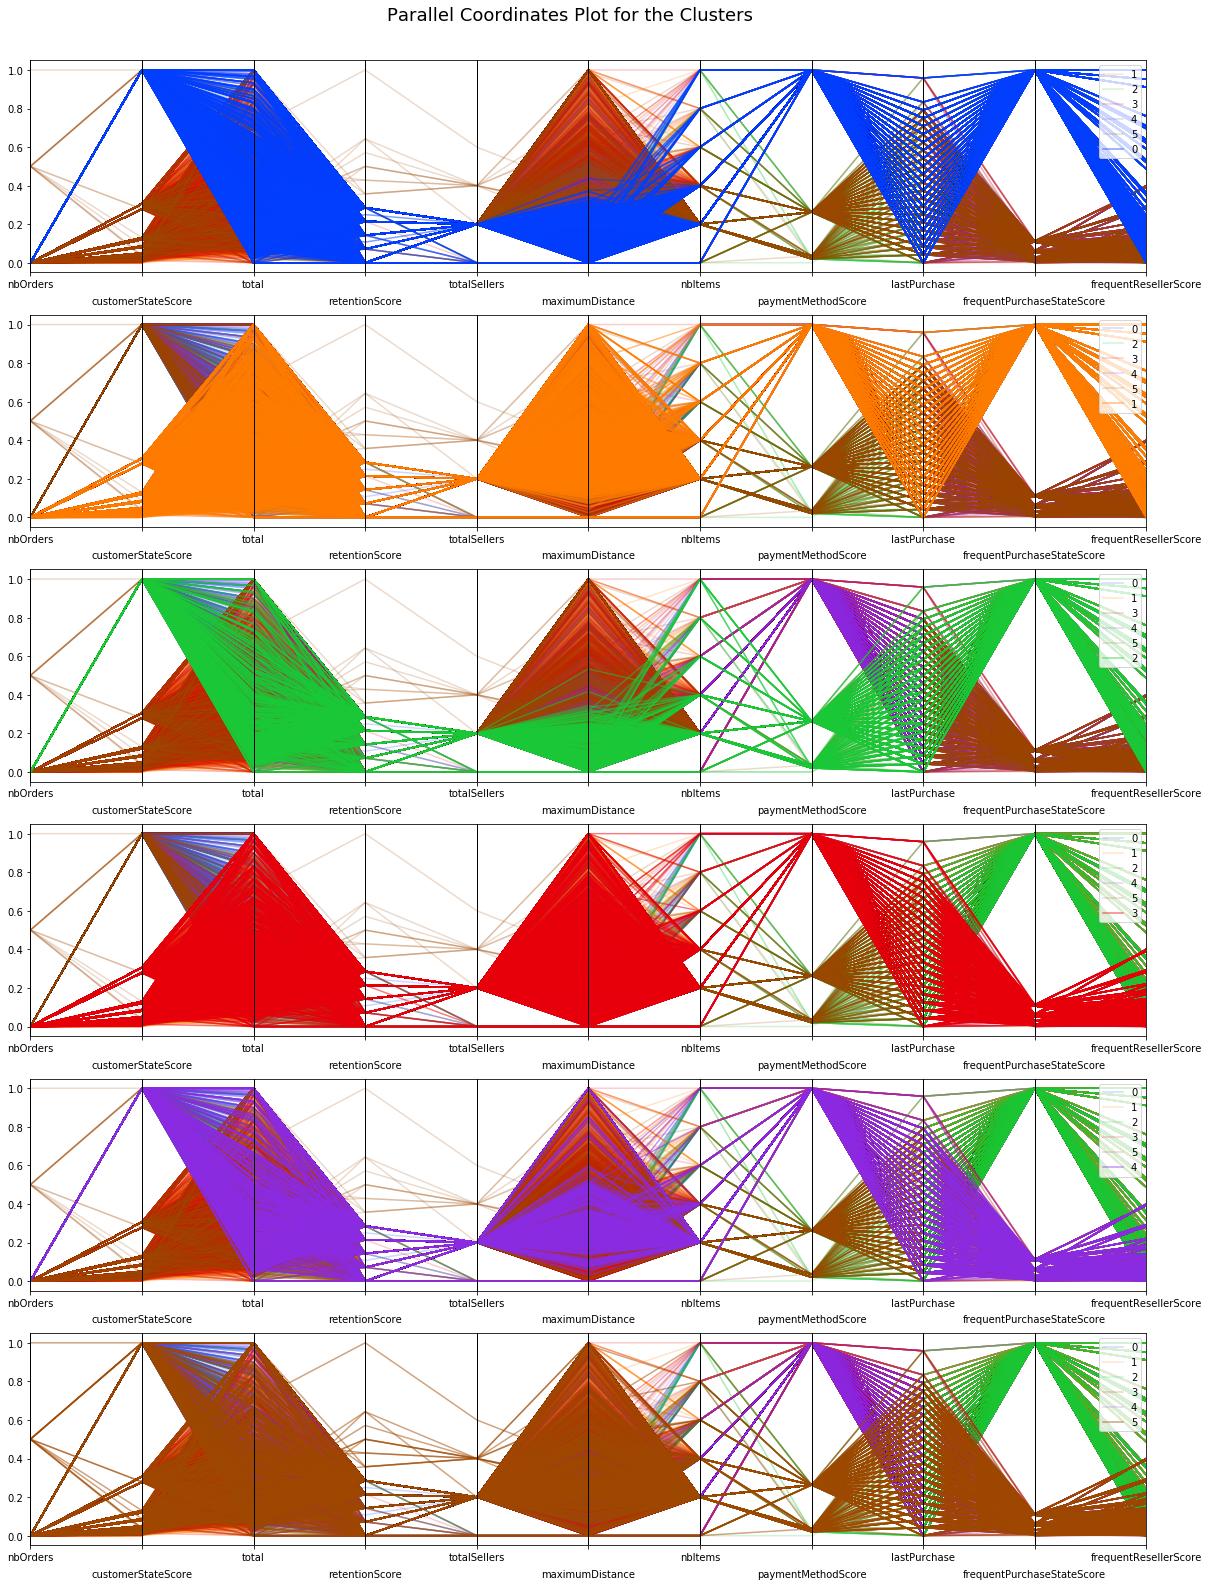

In [65]:
X['cluster']= labelsDB
sample=X.sample(frac=0.1, replace=True, random_state=1)
# Display parallel coordinates plots, one for each cluster
display_parallel_coordinates(sample, 6)


### ajuster Rand Index Testing for best parameters: xi, min cluster size

In [66]:
#Grid Search for OPTICS based model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
sc=make_scorer(adjusted_rand_score)
io={"parameter":{"xi": [.05,.01,.1] }}
ia={"parameter":{"min_cluster_size": [.05,.01,.1] }}

def customGrid(X, parXi, parameter=None):
    sam=X.sample(frac=0.1)
    lb= sam['cluster'] 
    sam= sam.drop('cluster',axis=1)
    average={}
    for k,v in parameter.items():
        
        for g in v:
            kw={k:g}
            if(parXi!=None):
                op = OPTICS(**kw,xi=parXi)
            else:
                op = OPTICS(**kw)
            kfold = KFold( n_splits=10)
            sco=[]

            for train_index, test_index in kfold.split(sam):
                train = sam.iloc[train_index]
                trainY=lb.iloc[train_index]
                test=sam.iloc[test_index]
                testY=lb.iloc[test_index]
                r1=op.fit(train).labels_
                r2=op.fit(test).labels_
                mm=adjusted_rand_score(r1,trainY)
                nn=adjusted_rand_score(r2,testY)
                mm=(mm+nn)/2
                sco.append(mm)
               
            ss=pd.DataFrame(sco).mean()
            
            average[g]=ss
    
    return average

def bestParams(firstPar):
    
    major=0
    sel=0
    for k,v in firstPar.items():
        if v.values>major:
            major=v.values
            sel=k
    print("Best params: "+ str(sel)+" : "+str(major))
    return sel
firstPar=customGrid(X,None, **io)
print("--------------------------------------------------")
sel= bestParams(firstPar)
dd=customGrid(X, sel,**ia)
y=bestParams(dd)

--------------------------------------------------
Best params: 0.1 : [0.04842531]
Best params: 0.05 : [0.89502068]


### OPTICS silhouette score and cluster visualization

In [67]:
#Silhouette Score for OPTICS based model

sam1=X
lb1= sam1['cluster'] 
sam1=sam1.drop('cluster',axis=1)
kfold = KFold( n_splits=5)
sco=[]

for train_index, test_index in kfold.split(sam1):
    train = sam1.iloc[train_index]
    trainY = lb1.iloc[train_index]
    test = sam1.iloc[test_index]
    testY = lb1.iloc[test_index]
    r1=silhouette_score(train, trainY)
    r2=silhouette_score(test, testY)
    mm=(r1+r2)/2
    sco.append(mm)
               
ss=pd.DataFrame(sco).mean()
print('Silhouette Score '+ str(ss.values))
'''
sam1=X
lb1= sam1['cluster'] 
sam1=sam1.drop('cluster',axis=1)
ssc=silhouette_score(sam1,lb1)
ssc
'''

Silhouette Score [0.30832277]


"\nsam1=X\nlb1= sam1['cluster'] \nsam1=sam1.drop('cluster',axis=1)\nssc=silhouette_score(sam1,lb1)\nssc\n"

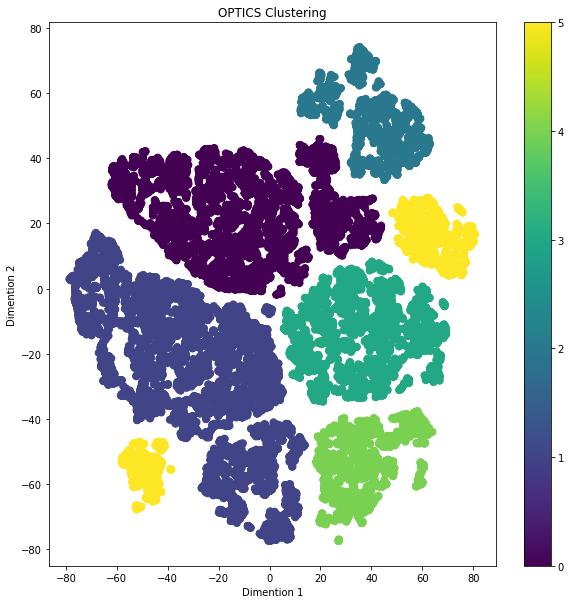

In [68]:
lsample= X.sample(frac=0.3)
X_embedded = TSNE(n_components=2).fit_transform(lsample)
dataV=pd.DataFrame(X_embedded, columns=["D1","D2"])
dataV['cluster']=lsample['cluster'].tolist()
dataV=dataV.loc[dataV["cluster"]>-1]
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
scatter = ax.scatter(dataV['D1'],dataV['D2'],
                  c=dataV['cluster'],   s=50)
ax.set_title('OPTICS Clustering')
ax.set_xlabel('Dimention 1')
ax.set_ylabel('Dimention 2')
plt.colorbar(scatter)

### Clusters OPTICS

Provided nnumber of clusters fits better business needs. Furthermore OPTICS bases its clustering on more variables than K-Means. Cluster visualization with help of T-SNE shows better cluster distribution over the dataset.

The following segments have been identified:

##### Deal Searcher- low number of orders, low number of resellers, relatively low retention score, all existing resellers
- Cluster 1 includes deal searchers who lives and purchases in San Paolo, they use credit card
- Cluster 2 includes deal searchers who lives outside of San Paolo and purchases in San Paolo, they also use credit card
- Cluster 3 includes deal searchers who lives and purchases from San Paolo but uses different payment method not credit card
##### Product searchers- purchases from non frequent resellers and therefore more interested in product, low NbOrders and low retention score
- Cluster 4 includes product searchers who lives outside of San Paolo and purchases outside of San Paolo, using credit card
- Cluster 5 includes product searchers whi lives and purchases in San Paolo, using credit card
##### Loyal customers, all type of retention score, various types of numbe rof orders and resellers
- Cluster 5 includes loyal customers who lives on San Paolo and purchases from outside of San Paolo, they are not big reseller oriented and not using credit card as payment method


# Comparative Summary
<table>
    <tr><th></th> <th>K-means </th>  <th>OPTICS</th></tr>
    <tr> <td>Nb clusters</td><td> 4   </td><td> 6</td></tr>
    <tr> <td>Silhouette Score</td><td> 0.31  </td><td> 0.3</td></tr>
    <tr> <td>ARI</td><td> 1  </td><td> 0.89</td></tr> 
</table>





In [72]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')